# Import Modules

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load Image and convert it to grayscale

In [ ]:
# Image is loaded using cv2.imread() method.
'''
syntax : cv2.imread(path,flag)
Parameters:
  path - string representing the path of the image to be read.
  flag - specifies the way, image should be read.
'''
img=cv2.imread("different_shapes.jpg")
image=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Apply threshold and find contours

In [ ]:
# converting image to binary image. (black and white only)
_,thresh= cv2.threshold(image,240,255,cv2.THRESH_BINARY)

# Detecting contours in image.
contours,_=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 

# Detect the type of shape

In [ ]:
# shape is detected using cv2.approxPolyDP() method,which approximates a curve or a polygon with another curve/polygon with less vertices so that 
# the distance between them is less or equal to the specified precision. It uses the Douglas-Peucker algorithm.
'''
syntax : cv2.approxPolyDP(curve, epsilon, closed[, approxCurve])
Parameters : 
  curve - Input vector
  epsilon - specify the approximation accuracy
  approxCurve - Result of the approximation. The type should match the type of the input curve.
'''

for contour in contours:
  Approx=cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)

  #draws boundary of the contours
  cv2.drawContours(img,[Approx],0,(255,255,255),6)

  x=Approx.ravel()[0]
  y=Approx.ravel()[1]
  
  if(len(Approx)==3):
    cv2.putText(img,"Triangle",(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5,(0,0,0))
  elif(len(Approx)==4):
    cv2.putText(img,"Quadrilateral",(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5,(0,0,0))
  elif(len(Approx)==5):
    cv2.putText(img,"pentagon",(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5,(0,0,0))
  elif(len(Approx)==6):
    cv2.putText(img,"Hexagon",(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5,(0,0,0))
  elif(len(Approx)==8):
    cv2.putText(img,"octagon",(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5,(0,0,0))
  elif(len(Approx)==10):
    cv2.putText(img,"star",(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5,(0,0,0))
  else:
    cv2.putText(img,"circle",(x,y),cv2.FONT_HERSHEY_COMPLEX_SMALL,0.5,(0,0,0))

# Display Final shape

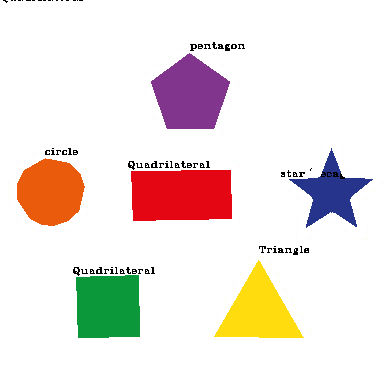

In [ ]:
cv2_imshow(img)